Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Kayla Kim 

In [3]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

# HW 6:  ODE Methods - Initial Value Problems

For all of these questions write your own functions for the ODE solvers and Newton's method (you can copy from your previous homework of course).

## Question 1 - Techniques for Systems of ODEs

Consider the system of ODEs

$$\begin{aligned}
v'''(t) &= t^2 v v'' - v w' \\
w''(t) &= t w w' + 4 v'
\end{aligned}$$
with 
$$
    v(0) = 1, v'(0) = \frac{1}{4}, v''(0) = \frac{1}{3}, w(0) = \frac{1}{2}, \quad \text{and} \quad w'(0) = 0.
$$

**(a)** (10) Write the system of differential equations as a first-order system of differential equations, $u' = f(x, u)$.

YOUR ANSWER HERE

Let $ u = \begin{bmatrix}
    v \\
    v' \\
    v'' \\
    w \\
    w'
\end{bmatrix}
= \begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    u_4 \\
    u_5
\end{bmatrix} $

Then $ u' = \frac{d}{dt} \begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    u_4 \\
    u_5
\end{bmatrix} 
= \begin{bmatrix}
    u_2 \\
    u_3 \\
    t^2u_1u_3-u_1u_5 \\
    u_5 \\
    tu_4u_5 + 4u_2
\end{bmatrix} $

**(b)** (10) Write code that solves the system using a method we discussed in class that is higher than 2nd order.  Do not use `scipy.integrate`.  Make sure to choose a method that will work for the non-linear right-hand-side.  Integrate the system to time $t_f = 1$ and plot the phase plane solution $(v, w)$.

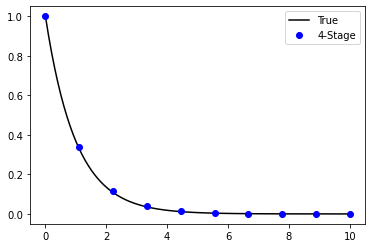

In [132]:
f = lambda t, u: -u

t_exact = numpy.linspace(0.0, 10.0, 100)
u_exact = numpy.exp(-t_exact)

N = 10
t = numpy.linspace(0, 10.0, N)
delta_t = t[1] - t[0]
u_4 = numpy.empty(t.shape)
u_4[0] = 1.0

for (n, t_n) in enumerate(t[1:]):
    y_1 = u_4[n]
    y_2 = u_4[n] + 0.5 * delta_t * f(t_n, y_1)
    y_3 = u_4[n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
    y_4 = u_4[n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
    u_4[n+1] = u_4[n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t_exact, u_exact, 'k', label="True")
axes.plot(t, u_4, 'bo', label="4-Stage")
axes.legend(loc=1)

plt.show()

# def f(t, u):
#     return numpy.array([u[1], u[2], t**2*u[0]*u[2] - u[0]*u[4], u[4], t*u[3]*u[4] + 4*u[1]])
    
# t_exact = numpy.linspace(0, 10.0, 100)
# u_exact = numpy.exp(-t_exact)

# t = numpy.linspace(0, 10.0, 10)
# delta_t = t[1] - t[0]
# u_4 = numpy.empty((5, numpy.size(t)))
# u_4[:, 0] = numpy.array([1, 1/4, 1/3, 1/2, 0])

# for (n, t_n) in enumerate(t[1:]):
#     y_1 = u_4[:, n]
#     y_2 = u_4[:, n] + 0.5 * delta_t * f(t_n, y_1)
#     y_3 = u_4[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
#     y_4 = u_4[:, n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
#     u_4[:, n+1] = u_4[:, n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
    
# fig = plt.figure()
# axes = fig.add_subplot(1, 1, 1)

# axes.plot(t, u_4, 'bo', label="4-Stage")
# axes.legend(loc=1)

# plt.show()

**(c)** (5) For systems of non-linear ODEs it is often useful to consider the linearization of the right-hand-side function $f$ and its properties as approximately linear in some region.  The Jacobian matrix $J(f)$ is often used in this context with
$$
    u' \approx J(f) u = A(t,u) u.
$$
This is useful if attempting to use an implicit method as we can evaluate the Jacobian matrix at the current time so that it is not dependent on $U_{n+1}$ and then solve a linear system of equations.

Compute the Jacobian matrix of $f(t, u)$ for the system from part (a).  Recall that the Jacobian matrix is defined as 
$$
    [J(f(t,u))]_{ij} = \frac{\partial}{\partial u_j}  f_i(t, u).
$$

YOUR ANSWER HERE


From part (a), we found that $ f(t, u) = \begin{bmatrix}
    u_2 \\
    u_3 \\
    t^2u_1u_3-u_1u_5 \\
    u_5 \\
    tu_4u_5 + 4u_2
\end{bmatrix}
$

The Jacobian of $f$ is given by: 

$$
    J(f(t,u)) = \begin{bmatrix}
        \frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} & \frac{\partial f_1}{\partial u_3} & \frac{\partial f_1}{\partial u_4} & \frac{\partial f_1}{\partial u_5} \\
        \frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2} & \frac{\partial f_2}{\partial u_3} & \frac{\partial f_2}{\partial u_4} & \frac{\partial f_2}{\partial u_5} \\
        \frac{\partial f_3}{\partial u_1} & \frac{\partial f_3}{\partial u_2} & \frac{\partial f_3}{\partial u_3} & \frac{\partial f_3}{\partial u_4} & \frac{\partial f_3}{\partial u_5} \\
        \frac{\partial f_4}{\partial u_1} & \frac{\partial f_4}{\partial u_2} & \frac{\partial f_4}{\partial u_3} & \frac{\partial f_4}{\partial u_4} & \frac{\partial f_4}{\partial u_5} \\
        \frac{\partial f_5}{\partial u_1} & \frac{\partial f_5}{\partial u_2} & \frac{\partial f_5}{\partial u_3} & \frac{\partial f_5}{\partial u_4} & \frac{\partial f_5}{\partial u_5} \\
    \end{bmatrix}
$$

So $J(f(t,u)) = $

$$
    \begin{bmatrix}
        0 & 1 & 0 & 0 & 0\\
        0 & 0 & 1 & 0 & 0\\
        t^2u_3-u_5 & 0 & t^2u_1 & 0 & -u_1\\
        0 & 0 & 0 & 0 & 1\\
        0 & 4 & 0 & tu_5 & tu_4\\
    \end{bmatrix}
$$

**(d)** (10) Now using the approach outlined in part (c) use the ODE solver Adams-Moulton 3-step to solve the equations.  This time you may use `numpy.linalg.solve`.  Please plot the results as before.

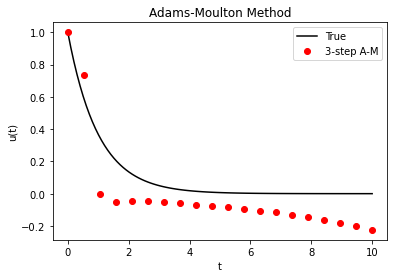

In [130]:
# YOUR CODE HERE
# From lecture example: Use 2-step Adams-Moulton to compute solution 
# u' = - decay u
decay_constant = 1.0
f = lambda t, u: -decay_constant * u

t_exact = numpy.linspace(0.0, 10.0, 100)
u_exact = numpy.exp(-t_exact)

N = 20
# N = 10
# N = 5
t = numpy.linspace(0, 10.0, N)
delta_t = t[1] - t[0]
U = numpy.empty(t.shape)
U[0] = 1.0
U[1] = U[0] + 0.5 * delta_t * f(t[0], U[0])
integration_constant = 1.0 / (1.0 + 9.0 * decay_constant * delta_t / 24.0)

for n in range(t.shape[0] - 3):
    U[n+3] = (U[n+2] + decay_constant * delta_t / 24.0 * (U[n] - 5.0 * U[n+1] + 19 * U[n+2])) * integration_constant

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t_exact, u_exact, 'k', label="True")
axes.plot(t, U, 'ro', label="3-step A-M")

axes.set_title("Adams-Moulton Method")
axes.set_xlabel("t")
axes.set_ylabel("u(t)")
axes.legend(loc=1)

plt.show()


**(e)** (5) Comment on what you observe from parts (b) and (d).  Try increasing the $t_f$ or changing the number of times steps you take (or shrink $\Delta t$).  Explain why you might see this behavior.

YOUR ANSWER HERE

The phase plane solution for part b (using Runge-Kutta) decreases exponentially over time. 
For part d, (3-stage Adam-Moulton), increases over time.  

## Question 2 - Lipschitz Constants

The Lipschitz constant is defined as the constant $L\in\mathbb{R}$ such that

$$||f(x, u) - f(x, u^*)|| \leq L ||u - u^*||.$$

The Lipschitz constant is useful for describing how much $f(x, u)$ changes if we change $u$.  This in turn then describes how much the slope of the solution $u'$ changes if $u$ is changed since $u' = f$.    

Now consider the system of ODEs

\begin{equation*}
\begin{split}
u_1' &= 3u_1 + 4u_2,\\
u_2' &= 5u_1 - 6u_2.\\
\end{split}
\end{equation*}

For the system of equations above find the Lipschitz constant if we use the $\ell_2$ norm which is defined as

$$|| v ||_{2} = \left (\sum^n_{i=1} v_i^2 \right )^{1/2}.$$

Note that the Lipschitz constant $L$ also provides an estimate to how long (or how much) we can trust the linearization given by the Jacobian $J$ in the last question.

YOUR ANSWER HERE

Rewriting the system of ODE's: 

$$
    f(x,u) = \begin{bmatrix}
        u_1' \\
        u_2' \\
    \end{bmatrix} = \begin{bmatrix}
        3u_1 + 4u_2 \\
        5u_1 - 6u_2 \\
    \end{bmatrix}
$$

The Lipschitz constant is defined as the constant $L\in\mathbb{R}$ such that

$$ ||f(x, u) - f(x, u^*)|| \leq L ||u - u^*|| $$

So 
\begin{equation}
\begin{split}
    || \begin{bmatrix}
        3u_1 + 4u_2 - 3u_1^* - 4u_2^* \\
        5u_1 - 6u_2 - 5u_1^* - 6u_2^* \\
    \end{bmatrix} || &≤ L || \begin{bmatrix}
        u_1 - u_1^* \\
        u_2 - u_2^* \\
    \end{bmatrix} || \\ 
    || \begin{bmatrix}
        3(u_1 - u_1^*) + 4(u_2 - u_2^*) \\
        5(u_1 - u_1^*) - 6(u_2 - u_2^*) \\
    \end{bmatrix} || &≤ L || \begin{bmatrix}
        u_1 - u_1^* \\
        u_2 - u_2^* \\
    \end{bmatrix} || \\
    || \begin{bmatrix}
        3 \Delta u_1 + 4 \Delta u_2 \\
        5 \Delta u_1 - 6 \Delta u_2 \\
    \end{bmatrix} || &≤ L || \begin{bmatrix}
        \Delta u_1 \\
        \Delta u_2 \\
    \end{bmatrix} || \\
\end{split}
\end{equation}

Using the $\ell_2$ norm (i.e. Euclidean norm), we find that 

\begin{equation}
\begin{split}
    \sqrt{(3 \Delta u_1 + 4 \Delta u_2)^2 + (5 \Delta u_1 - 6 \Delta u_2)^2} &≤ L\sqrt{\Delta u_1^2 + \Delta u_2^2} \\
    \sqrt{34 \Delta u_1^2 - 36 \Delta u_1 \Delta u_2 + 52 \Delta u_2^2} &≤ L\sqrt{\Delta u_1^2 + \Delta u_2^2} \\
    \sqrt{34 \Delta u_1^2 - 36 \Delta u_1 \Delta u_2 + 52 \Delta u_2^2} &≤ \sqrt{L^2 \Delta u_1^2 + L^2 \Delta u_2^2} 
\end{split}
\end{equation}

So finally, L = $\sqrt{52}$

## Question 3 - Orbits

Newton's equations for the motion of a particle (he sure gets around doesn't he) in planar orbit with eccentricity $e$ where $0 < e < 1$ are

$$\begin{aligned}
    x''(t) &= -\frac{x}{r^3}, ~~~~ &x(0) &= 1 - e, ~~~~ &x'(0) &= 0, \\
    y''(t) &= -\frac{y}{r^3}, ~~~~ &y(0) &= 0, ~~~~ &y'(0) &= \sqrt{\frac{1 + e}{1 - e}}
\end{aligned}$$

with $r^2 = x^2 + y^2.$

**(a)** (5) Reformulate the problem as an initial value problem for a system of first-order differential equations.

YOUR ANSWER HERE

Let $ u = \begin{bmatrix}
    x \\
    x' \\
    y \\
    y' 
\end{bmatrix}
= \begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    u_4 
\end{bmatrix} $

Then $ u' = \frac{d}{dt} \begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    u_4 
\end{bmatrix} 
= \begin{bmatrix}
    u_2 \\
    -\frac{u_1}{r^3} \\
    u_4 \\
    -\frac{u_3}{r^3} 
\end{bmatrix} $

**(b)** (5) Write a function that computes the solution to the IVP from (b) given a provided set of time steps and eccentricity $e$ using a 2nd order Runge-Kutta method.  The function should only return the values of $x$ and $y$.

In [94]:
# Reference: "Example: 4stage RK Method" 
# https://github.com/mandli/intro-numerical-methods/blob/master/09_ODE_ivp_part1.ipynb

def solve_orbit_RK2(t, e):
    # YOUR CODE HERE
    
    def f(t, u):
        return numpy.array([u[1], -1 / numpy.sqrt(u[0]**2 + u[2]**2)**3 * u[0], u[3], -1 / numpy.sqrt(u[0]**2 + u[2]**2)**3 * u[2]])
    delta_t = t[1] - t[0]
    u_2 = numpy.empty((4, numpy.size(t)))
    u_2[:, 0] = numpy.array([1-e, 0, 0, numpy.sqrt((1+e)/(1-e))])
    
    for (n, t_n) in enumerate(t[1:]):
        u_2[:, n+1] = u_2[:,n] + 0.5 * delta_t * f(t_n, u_2[:,n])
        u_2[:, n+1] = u_2[:,n] + delta_t * f(t_n, u_2[:,n+1])

    x = u_2[0,:]
    y = u_2[2,:]
    
    return x, y

In [95]:
# Testing to make sure that the solution remains bounded in the testing interval
x, y = solve_orbit_RK2(numpy.linspace(0.0, 10.0, 1000), 0.9)
assert(numpy.all(numpy.abs(x) < 10.0))
assert(numpy.all(numpy.abs(y) < 10.0))
print("Solutions remained bounded for testing interval.")

Solutions remained bounded for testing interval.


**(c)** (5) Plot the trajectory of the orbiting particle parametrically given $e = 0.9$ and times between $t = [0, 100]$.

Text(0, 0.5, 'y')

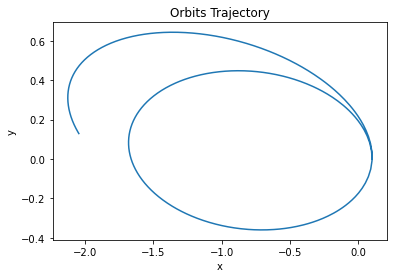

In [80]:
t = numpy.linspace(0.0, 10.0, 1000)
e = 0.9
# YOUR CODE HERE

x, y = solve_orbit_RK2(t, e)
plt.plot(x,y)
plt.title("Orbits Trajectory")
plt.xlabel("x")
plt.ylabel("y")

## Question 4 - Absolute Stability Regions and Order Stars

**(a)** (15) Plot the regions of absolute stability for the following:
1. Taylor Series methods of order 2 to 5,
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.

For the Taylor series methods also determine the interior and exterior of the stability regions.

In [106]:
# REFERENCE: "Plotting Stability Regions" https://github.com/mandli/intro-numerical-methods/blob/master/09_ODE_ivp_part2.ipynb

def plot_stability(X, Y, C, axes, title=None, continuous=True):
    pcolor_plot = axes.pcolor(X, Y, C, vmin=0, vmax=1, cmap=plt.get_cmap('Blues_r'), shading = 'auto')
    fig = plt.gcf()
    fig.colorbar(pcolor_plot)
    axes.contour(X, Y, C, 'k', levels=[1.0])
    axes.plot(x, numpy.zeros(x.shape),'k--')
    axes.plot(numpy.zeros(y.shape), y,'k--')
    axes.set_aspect('equal')    
    axes.set_xlabel(r"$\Re$")
    axes.set_ylabel(r"$\Im$")
    if title is not None:
        axes.set_title(title, fontsize=12)
    
# for 
def plot_stability_taylor(R, x, y, axes=None, title=None):
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    abs_R = numpy.abs(R(Z))
    plot_stability(X, Y, numpy.abs(R(Z)), axes, title)
    
# Evaluate which regions are actually in stability region

print("Taylor series method of order 4 - Stability region tests")
z = -1 + 1j * 0
print("  Inside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3 + 1.0 / 24.0 * z**4))
z = -4 + 1j * 0
print("  Outside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3 + 1.0 / 24.0 * z**4))


Taylor series method of order 4 - Stability region tests
  Inside of strange region:  0.37500000000000006
  Outside of strange region:  5.0


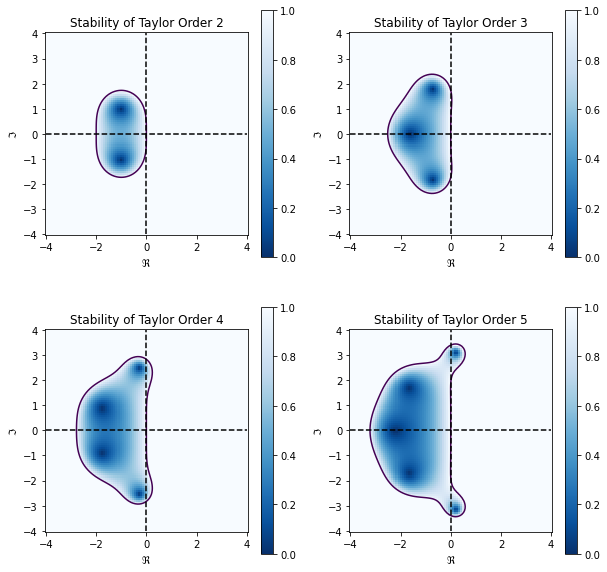

In [101]:
# PLOT OF TAYLOR SERIES 2-5

x = numpy.linspace(-4,4,100)
y = numpy.linspace(-4,4,100)

R_Taylor2 = lambda z: 1 + z + z**2/2
R_Taylor3 = lambda z: 1 + z + z**2/2 + z**3/6
R_Taylor4 = lambda z: 1 + z + z**2/2 + z**3/6. + z**4/24.
R_Taylor5 = lambda z: 1 + z + z**2/2 + z**3/6. + z**4/24 + z**5/120

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(2,2,1)
plot_stability_taylor(R_Taylor2, x, y, axes=axes, title='Stability of Taylor Order 2')

axes = fig.add_subplot(2,2,2)
plot_stability_taylor(R_Taylor3, x, y, axes=axes, title='Stability of Taylor Order 3')

axes = fig.add_subplot(2,2,3)
plot_stability_taylor(R_Taylor4, x, y, axes=axes, title='Stability of Taylor Order 4')

axes = fig.add_subplot(2,2,4)
plot_stability_taylor(R_Taylor5, x, y, axes=axes, title='Stability of Taylor Order 5')


In [102]:
def plot_stability_adams(pi_coeff, x, y, axes=None, title=None):
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    norm_max = numpy.empty(Z.shape)
    for i,row in enumerate(Z):
        for j, z in enumerate(row):
            norm_max[i,j] = max(numpy.abs(numpy.roots(pi_coeff(z))))
    
    stability_plot(X, Y, norm_max, axes, title)

<ipython-input-38-c340b9234e70>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Blues_r'))
<ipython-input-38-c340b9234e70>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Blues_r'))
<ipython-input-38-c340b9234e70>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated

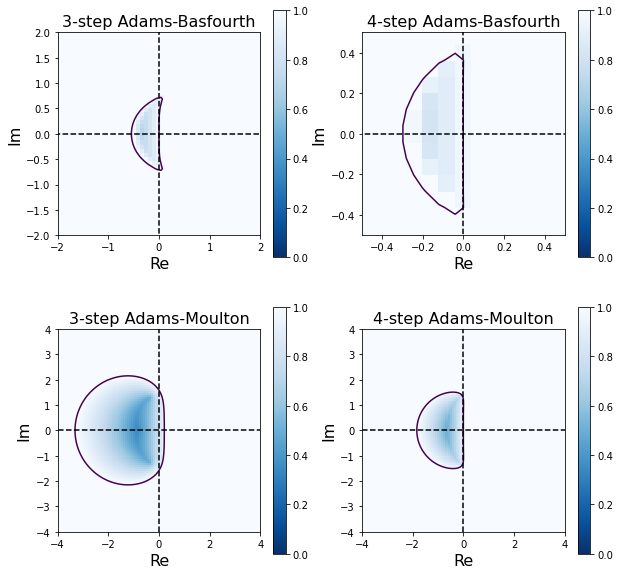

In [103]:
# 3-step and 4-step Adams-Basforth methods, and
# 3-step and 4-step Adams-Moulton methods.

AB_3 = lambda z: numpy.array([1,-(1+23*z/12), 16*z/12, -5*z/12])
AB_4 = lambda z: numpy.array([24, -24-55*z, 59*z, -37*z, 9*z])
AM_3 = lambda z: numpy.array([29-9*z, -19*z-24, 5*z, -z])
AM_4 = lambda z: numpy.array([720-251*z, -720-646*z, 264*z, -106*z, 19*z])

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(2,2,1)
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plot_stability_adams(AB_3, x, y, axes=axes, title='3-step Adams-Basfourth')

axes = fig.add_subplot(2,2,2)
axes.set_xlim([-.5,.5])
axes.set_ylim([-.5,.5])
plot_stability_adams(AB_4, x, y, axes=axes, title='4-step Adams-Basfourth')

axes = fig.add_subplot(2,2,3)
axes.set_xlim([-4,4])
axes.set_ylim([-4,4])
plot_stability_adams(AM_3, x, y, axes=axes, title='3-step Adams-Moulton')

axes = fig.add_subplot(2,2,4)
axes.set_xlim([-4,4])
axes.set_ylim([-4,4])
plot_stability_adams(AM_4, x, y, axes=axes, title='4-step Adams-Moulton')

**(b)** (15) The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Plot the region $\mathcal{A}_{0}$ for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?

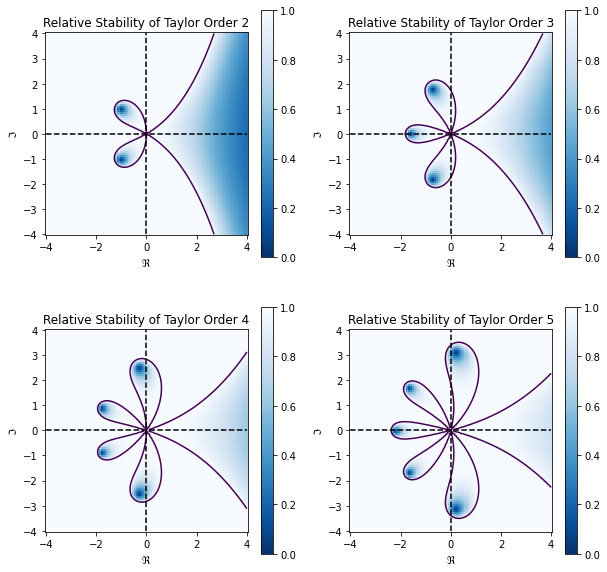

In [104]:
# YOUR CODE HERE

x = numpy.linspace(-4,4,100)
y = numpy.linspace(-4,4,100)

OS2 = lambda z: numpy.exp(-z)*(1 + z + z**2/2)
OS3 = lambda z: numpy.exp(-z)*(1 + z + z**2/2 + z**3/6.)
OS4 = lambda z: numpy.exp(-z)*(1 + z + z**2/2 + z**3/6. + z**4/24)
OS5 = lambda z: numpy.exp(-z)*(1 + z + z**2/2 + z**3/6. + z**4/24 + z**5/120)

fig = plt.figure(figsize=(10,10))

axes = fig.add_subplot(2,2,1)
plot_stability_ssms(OS2, x, y, axes=axes, title='Relative Stability of Taylor Order 2')

axes = fig.add_subplot(2,2,2)
plot_stability_ssms(OS3, x, y, axes=axes, title='Relative Stability of Taylor Order 3')

axes = fig.add_subplot(2,2,3)
plot_stability_ssms(OS4, x, y, axes=axes, title='Relative Stability of Taylor Order 4')

axes = fig.add_subplot(2,2,4)
plot_stability_ssms(OS5, x, y, axes=axes, title='Relative Stability of Taylor Order 5')

The number of fingers = the order used in the Taylor method.

## Question 5 - SciPy Integrate

Consider the decay process
$$
    A \overset{K_1}{\rightarrow} B \overset{K_2}{\rightarrow} C \overset{K_3}{\rightarrow} D
$$
represented by the system of ODEs
\begin{align*}
    \frac{\text{d}A}{\text{d}t} &= -K_1 A \\
    \frac{\text{d}B}{\text{d}t} &= K_1 A - K_2 B \\
    \frac{\text{d}C}{\text{d}t} &= K_2 B - K_3 C \\
    \frac{\text{d}D}{\text{d}t} &= K_3 C \\
\end{align*}

**(a)** (10) Write a function that uses `scipy.integrate` to compute the solution to the system of ODEs given an initial condition and time points to output at.  This function should take in the time points for the output, an initial condition, the ODE integrator to use (default to "dopri5"), and the reaction rates $K_1$, $K_2$, and $K_3$.

In [36]:
# --------- CHANGE THIS SHIT UPPP -----------
# SOURCE: "Examples: Van der Pol Oscillator" https://github.com/mandli/intro-numerical-methods/blob/master/09_ODE_ivp_part1.ipynb

import scipy.integrate as integrate 

def solve_decay_system(t, u_0, solver_type="dopri5", K_1=0.0, K_2=0.0, K_3=0.0):
    # YOUR CODE HERE

    f = lambda t, u: numpy.array( [-K_1 * u[0], K_1 * u[0] - K_2 * u[1], K_2 * u[1] - K_3 * u[2], K_3 * u[2]])
    
    U = numpy.empty((numpy.size(t), 4))
    U[0,:] = u_0
    
    integrator = integrate.ode(f)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(U[0,:])
    
    for (n, t_n) in enumerate(t[1:]):
        integrator.integrate(t_n)
        if not integrator.successful():
            break
        U[n+1,:] = integrator.y
    
    return U 

In [37]:
t = numpy.linspace(0.0, 10.0, 10)
u_0 = numpy.array([1.0, 0.0, 0.0, 0.0])
U = solve_decay_system(t, u_0, solver_type='dopri5', K_1=1.0, K_2=2.0, K_3=3.0)
U_sol = numpy.array([[1.0000000000000000e+00, 0.0000000000000000e+00,
                      0.0000000000000000e+00, 0.0000000000000000e+00],
                     [3.2919298826277271e-01, 2.2082495381343401e-01,
                      1.4813096181267352e-01, 3.0185109611111993e-01],
                     [1.0836802654276900e-01, 9.6624368667878130e-02,
                      8.6153390524786266e-02, 7.0885421426456674e-01],
                     [3.5673996630001523e-02, 3.4401353001617396e-02,
                      3.3174114479337484e-02, 8.9675053588904374e-01],
                     [1.1743631968628626e-02, 1.1605715517361529e-02,
                      1.1469419325266718e-02, 9.6518123318874338e-01],
                     [3.8659219913406520e-03, 3.8509760174843801e-03,
                      3.8360878593115726e-03, 9.8844701413186375e-01],
                     [1.2726346009991362e-03, 1.2710149139283067e-03,
                      1.2693972897971615e-03, 9.9618695319527573e-01],
                     [4.1894244902209761e-04, 4.1876692442412833e-04,
                      4.1859147343448249e-04, 9.9874369915311978e-01],
                     [1.3791293652887476e-04, 1.3789391503107924e-04,
                      1.3787489615970831e-04, 9.9958631825228084e-01],
                     [4.5399978275093905e-05, 4.5397916926305302e-05,
                      4.5395855671230534e-05, 9.9986380624912774e-01]])
numpy.testing.assert_allclose(U, U_sol)
print("Success!")

Success!
